## Aprendizado Não Supervisionado - Redução de Dimensionalidade
#### Prof. Thomas da Silva Paula

### Autoencoder - Demo 1

* Utilização de Autoencoder em caso de uso com imagens.
* Base de dados MNIST, muito comum para exemplos.
* Exemplo baseado em: https://blog.keras.io/building-autoencoders-in-keras.html

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.datasets import mnist

from IPython.display import SVG
from keras.utils import vis_utils

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

### Carregar a base de dados e inspecionar algumas informações

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)
(10000, 28, 28)


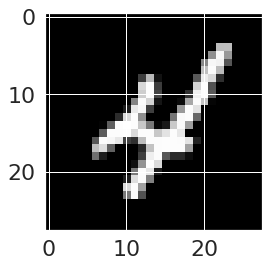

In [3]:
plt.gray()
plt.imshow(X_train[9])

### Pré-processamento

In [4]:
num_images, width, height = X_train.shape
input_size = width * height

In [5]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), input_size))
X_test = X_test.reshape((len(X_test), input_size))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


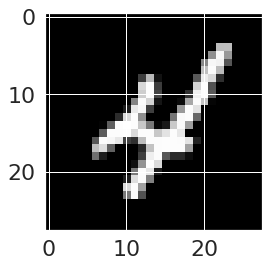

In [6]:
plt.gray()
plt.imshow(X_train[9].reshape((28, 28)))

### Modelo

#### Autoencoder

In [7]:
encoding_size = 32
input_img = Input(shape=(input_size,))
encoded = Dense(encoding_size, activation='relu')(input_img)
decoded = Dense(input_size, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [8]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


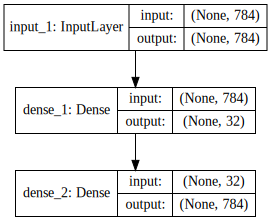

In [29]:
SVG(vis_utils.model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

#### Encoder

In [9]:
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


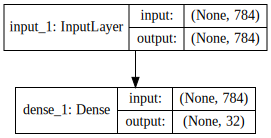

In [30]:
SVG(vis_utils.model_to_dot(encoder, show_shapes=True).create(prog='dot', format='svg'))

#### Decoder

In [10]:
encoded_input = Input(shape=(encoding_size,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


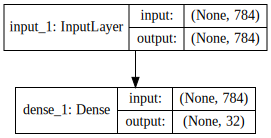

In [31]:
SVG(vis_utils.model_to_dot(encoder, show_shapes=True).create(prog='dot', format='svg'))

### Treinamento

In [11]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.3500 - acc: 0.7595 - val_loss: 0.2702 - val_acc: 0.7956
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2628 - acc: 0.7980 - val_loss: 0.2510 - val_acc: 0.7965
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2401 - acc: 0.7976 - val_loss: 0.2273 - val_acc: 0.7962
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2205 - acc: 0.7973 - val_loss: 0.2106 - val_acc: 0.7974
Epoch 5/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2055 - acc: 0.7988 - val_loss: 0.1975 - val_acc: 0.7996
Epoch 6/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1938 - acc: 0.8003 - val_loss: 0.1874 - val_acc: 0.8005
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1851 - acc: 0.8014 - val_loss: 0.1800 - val_acc

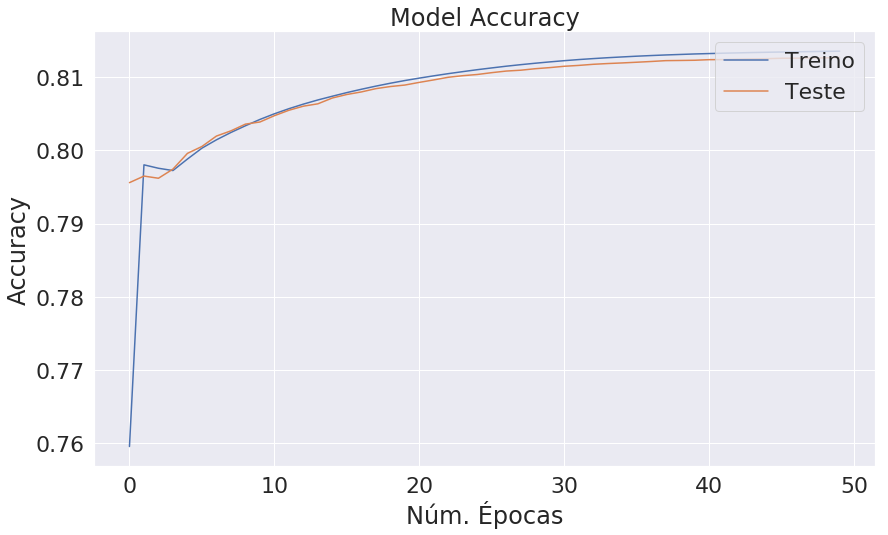

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Núm. Épocas')
plt.legend(['Treino', 'Teste'], loc='upper right')
plt.show()

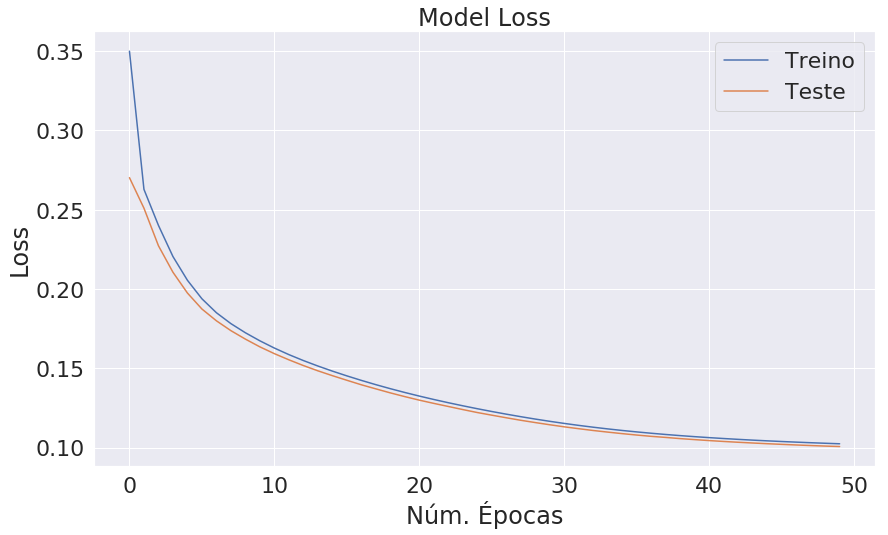

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Núm. Épocas')
plt.legend(['Treino', 'Teste'], loc='upper right')
plt.show()

In [20]:
autoencoder.save_weights('trained_model_50.hdf5')

#### Avaliar resultados

In [15]:
# Fazemos o processo de encoding para reduzir as dimensões e o de decoding para reconstruir
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

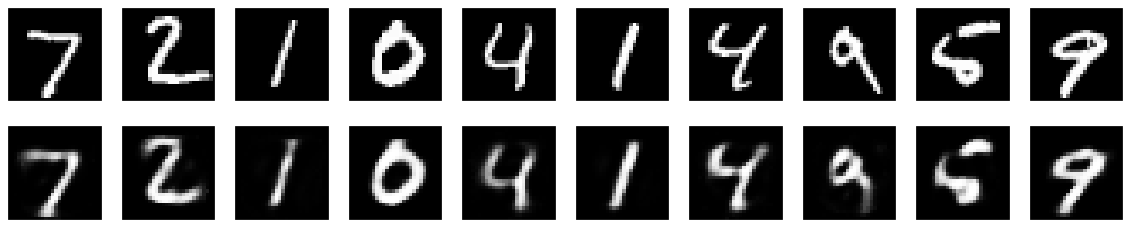

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()